In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.40, random_state=0)

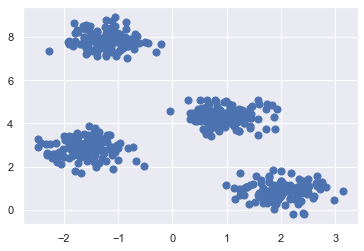

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4)

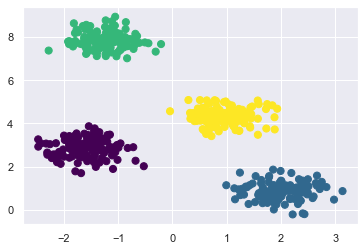

In [5]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

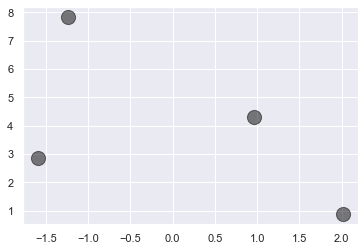

In [6]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [7]:
import numpy as np
from sklearn.cluster import MeanShift

import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

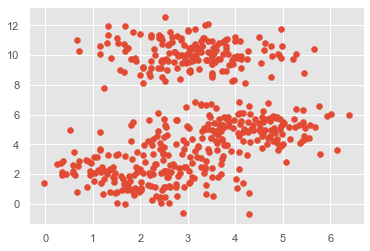

In [8]:
centers = [[2,2],[4,5],[3,10]]

X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
ms = MeanShift()
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [10]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))

print("Estimated clusters:", n_clusters_)

[[ 2.23913146  2.30298265]
 [ 3.85415048  4.69247299]
 [ 3.09172679 10.08919055]]
Estimated clusters: 3


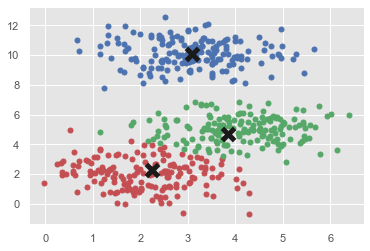

In [11]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [12]:
# Calculating Silhouette Score

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

In [14]:
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.40, random_state=0)

scores = []
values = np.arange(2, 10)

for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    
score = metrics.silhouette_score(X, kmeans.labels_, 
                                 metric='euclidean', sample_size=len(X))

print("\nNumber of clusters =", num_clusters)
print("Silhouette score =", score)

scores.append(score)

num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)


Number of clusters = 9
Silhouette score = 0.3302776336913355

Optimal number of clusters = 2


In [15]:
# Finding Nearest Neighbors

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [17]:
A = np.array([[3.1, 2.3], [2.3, 4.2], 
              [3.9, 3.5], [3.7, 6.4], 
              [4.8, 1.9], [8.3, 3.1], 
              [5.2, 7.5], [4.8, 4.7], 
              [3.5, 5.1], [4.4, 2.9],])

k = 3

test_data = [3.3, 2.9]

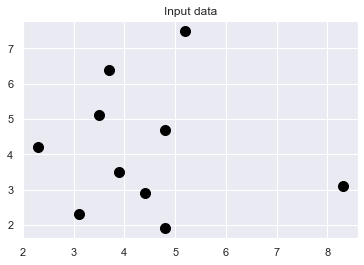

In [18]:
plt.figure()
plt.title('Input data')

plt.scatter(A[:,0], A[:,1], marker='o', s=100, color='black')

In [19]:
knn_model = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)

distances, indices = knn_model.kneighbors([test_data])

print("\nK Nearest Neighbors:")


K Nearest Neighbors:


In [ ]:
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " is", A[index])
    
plt.figure()

plt.title('Nearest neighbors')

plt.scatter(A[:, 0], X[:, 1], marker='o', s=100, color='k')

plt.scatter(A[indices][0][:][:, 0], A[indices][0][:][:, 1],
            marker='o', s=250, color='k', facecolors='none')

plt.scatter(test_data[0], test_data[1],
            marker='x', s=100, color='k')

plt.show()

In [ ]:
# K-Nearest Neighbors Classifier

In [22]:
from sklearn.datasets import *
import pandas as pd

%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import numpy as np

In [23]:
def Image_display(i):
    plt.imshow(digit['images'][i],cmap='Greys_r')
    plt.show()

In [24]:
digit = load_digits()
digit_d = pd.DataFrame(digit['data'][0:1600])

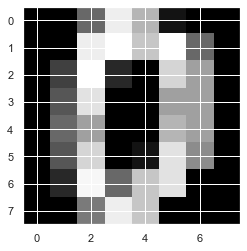

In [25]:
Image_display(0)

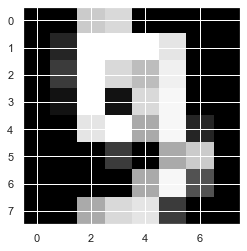

In [26]:
Image_display(9)

In [27]:
train_x= digit['data'][:1600]
train_y = digit['target'][:1600]

KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=20)

In [28]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=20)

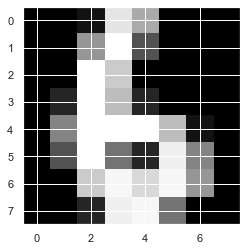

In [29]:
test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1)

Image_display(1725)

In [30]:
KNN.predict(test1)

array([6])

In [31]:
digit['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

matplotlib: 3.5.2
sys       : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
sklearn   : 1.1.1
pandas    : 1.4.3
seaborn   : 0.11.2
numpy     : 1.23.0



### End.